In [8]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

In [9]:
### Limit the amount of memory for each session

from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()

config.gpu_options.per_process_gpu_memory_fraction = 0.1
set_session(tf.Session(config=config))



Using TensorFlow backend.


In [11]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [12]:
sess = tf.InteractiveSession()

In [13]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [14]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))


In [15]:
tf.global_variables_initializer().run()

In [16]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )


In [17]:
for i in range(200): step.run()

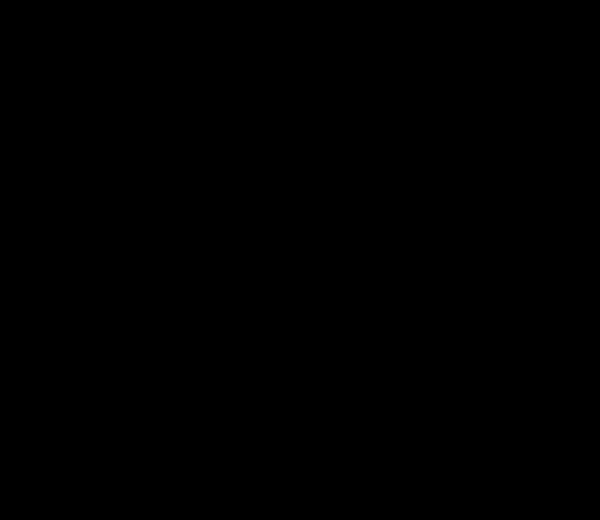

In [ ]:
DisplayFractal(ns.eval())

In [ ]:
import numpy as np
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x:x_train, y:y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

In [ ]:
E = tf.Variable([100.], tf.float32)
t = tf.constant(3.1)


In [ ]:
def body(x):
    a = tf.random_uniform(shape=[2, 2], dtype=tf.int32, maxval=100)
    b = tf.constant(np.array([[1, 2], [3, 4]]), dtype=tf.int32)
    c = a + b
    return tf.nn.relu(x + c)

def condition(x):
    return tf.reduce_sum(x) < 100

x = tf.Variable(tf.constant(0, shape=[2, 2]))

with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    result = tf.while_loop(condition, body, [x])
    for i in range(1000):
      sess.run(train, {x:x_train, y:y_train})


    print(result.eval())

In [ ]:
nb_months=25*12
ech = tf.Variable(tf.constant(100., dtype=tf.float32))
cpr = tf.placeholder(tf.float32)
taux = tf.constant(0.03, dtype=tf.float32)
initial_e = tf.constant(0, dtype='int32')
cpinit = tf.constant(200000., dtype=tf.float32)


def body(nbe,cp):
    return nbe+1,cp*(1+taux/12)-ech

def condition(nbe,cp):
    return nbe<nb_months


with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    duration,remain = tf.while_loop(condition, body, [initial_e,cpinit])
    optimizer = tf.train.GradientDescentOptimizer(tf.abs(remain/cpinit))

    loss=tf.abs(remain)
    train = optimizer.minimize(loss)
    prev_ech=0.
    while abs(ech.eval()-prev_ech)>0.01:
        print(ech.eval(),remain.eval(),abs(ech.eval()-prev_ech))
        prev_ech=ech.eval()
        sess.run(train)

    print(ech.eval())

In [ ]:
help(tf.train.GradientDescentOptimizer)

In [3]:
import tensorflow.contrib.seq2seq as s2s

In [10]:
import tensorflow.helpers

ImportError: No module named 'tensorflow.helpers'

In [11]:
tensorflow.__version__

'1.0.1'